In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_utils import *
from viz_utils import *
from lstm_obj import lstm

## Sierra Negra
### Training

In [2]:
# Load training data
import pickle
data = pickle.load(open('training_data.p', 'rb'))['sierra negra']

# Build dataset
dataset = build_dataset({'series' : data['series'], 'dates' : data['dates']})
trainset, validset = dataset['train'], dataset['test']

## Train and validate 
lstm_obj = lstm(n_in=trainset['diff'].shape[1]-1, 
                n_out=1, 
                n_feat=trainset['diff'].shape[2],
                n_repeat=2)
lstm_obj.train_and_validate_lstm(trainset['diff'], trainset['raw'],
                                 validset['diff'], validset['raw'])

In [3]:
print (f"Selected Model Rmse Test Set: {lstm_obj.min_rmse}")

## TODO: save model using Keras appropriate function
#pickle.dump({'model' : lstm_obj.model}, open('sierra_negra_model.pickle', 'wb'))

Selected Model Rmse Test Set: 0.05753678210952991


### Inference - Anomaly Maps

In [5]:
# Read data
path = '/Users/cendon/Desktop/Volcano Anomaly/volcano_data/aria-data/galapagos_201412-202007-1/timeseries_demErr.h5'
data, dates = read_data(path)
active_range = (1365, 1425), (640, 721) # Coordinates of active region
grid_size=3
time_window=9

assert ((active_range[0][1] - active_range[0][0]) % grid_size == 0)
assert ((active_range[1][1] - active_range[1][0]) % grid_size == 0)

# input to lstm is "diffed"
data_active_raw = crop_volcanodata(data, active_range)
data_active_diff = np.diff(data_active_raw, axis=0) 
data_active_raw = data_active_raw[1:, :, :]
assert (data_active_raw.shape == data_active_diff.shape)

anomaly_map = build_anomaly_map({'raw' : data_active_raw, 'diff' : data_active_diff}, lstm_obj)
print (anomaly_map.shape)

(192, 60, 81)


### Visualizing Anomaly Maps

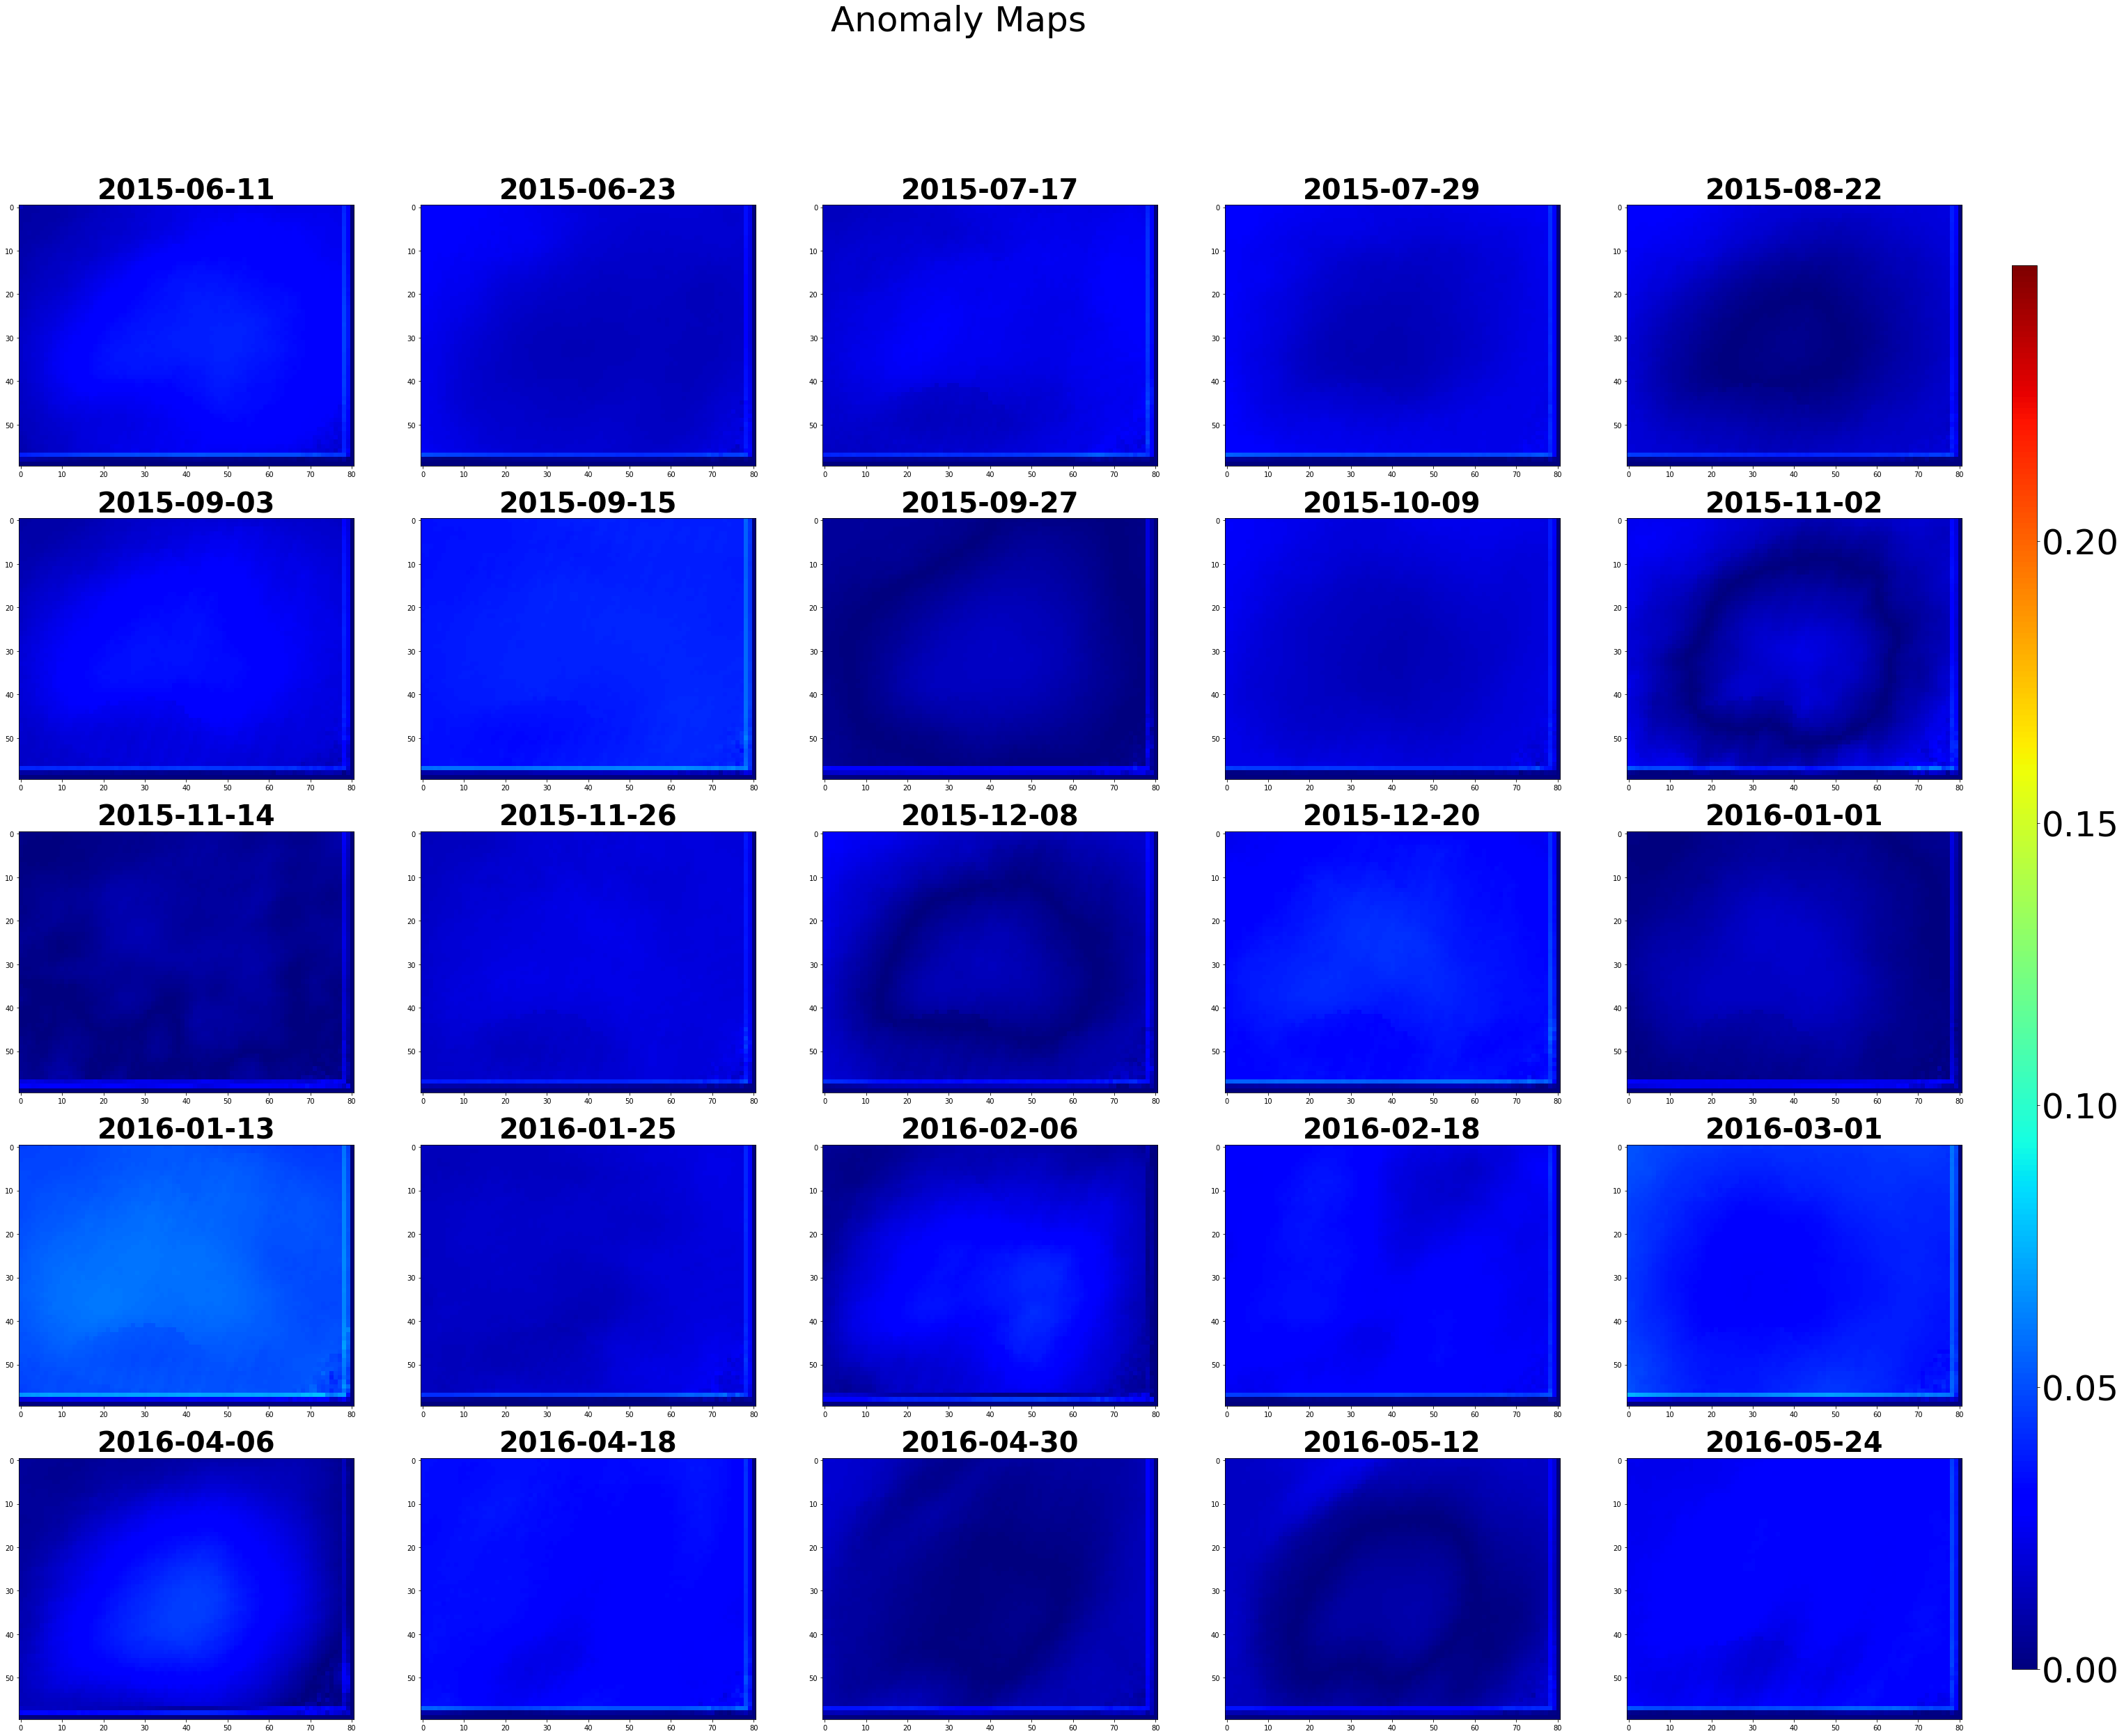

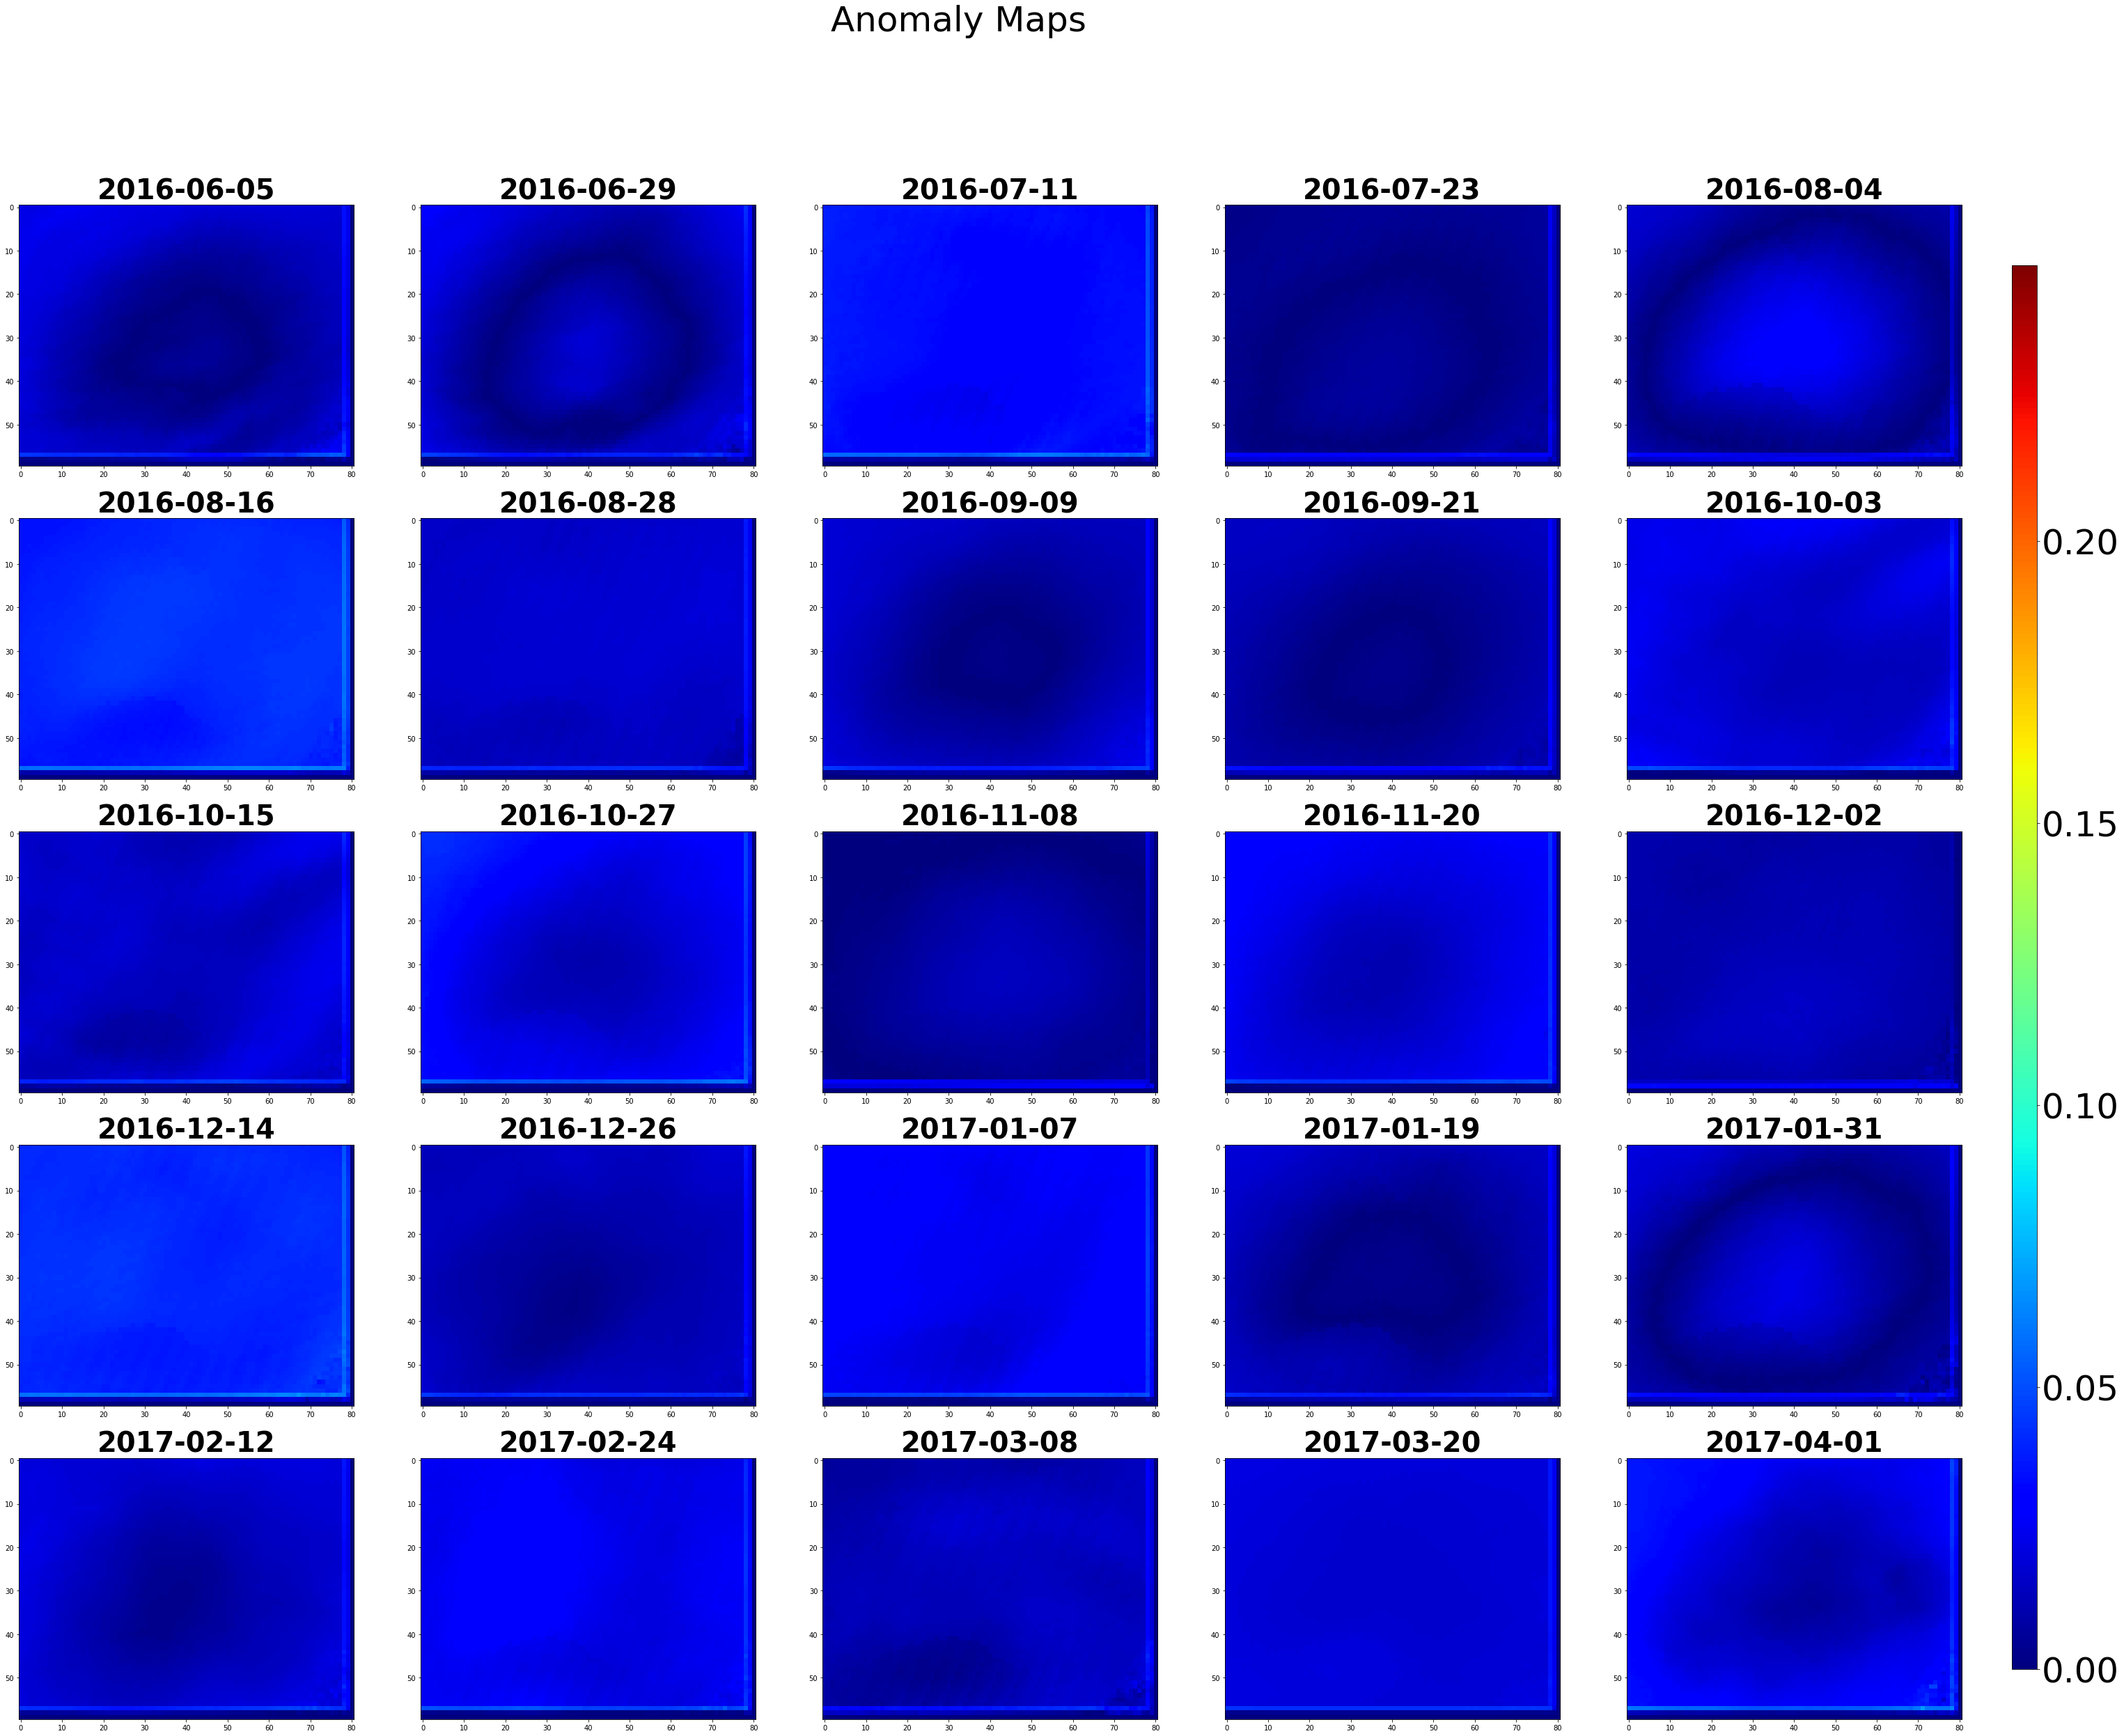

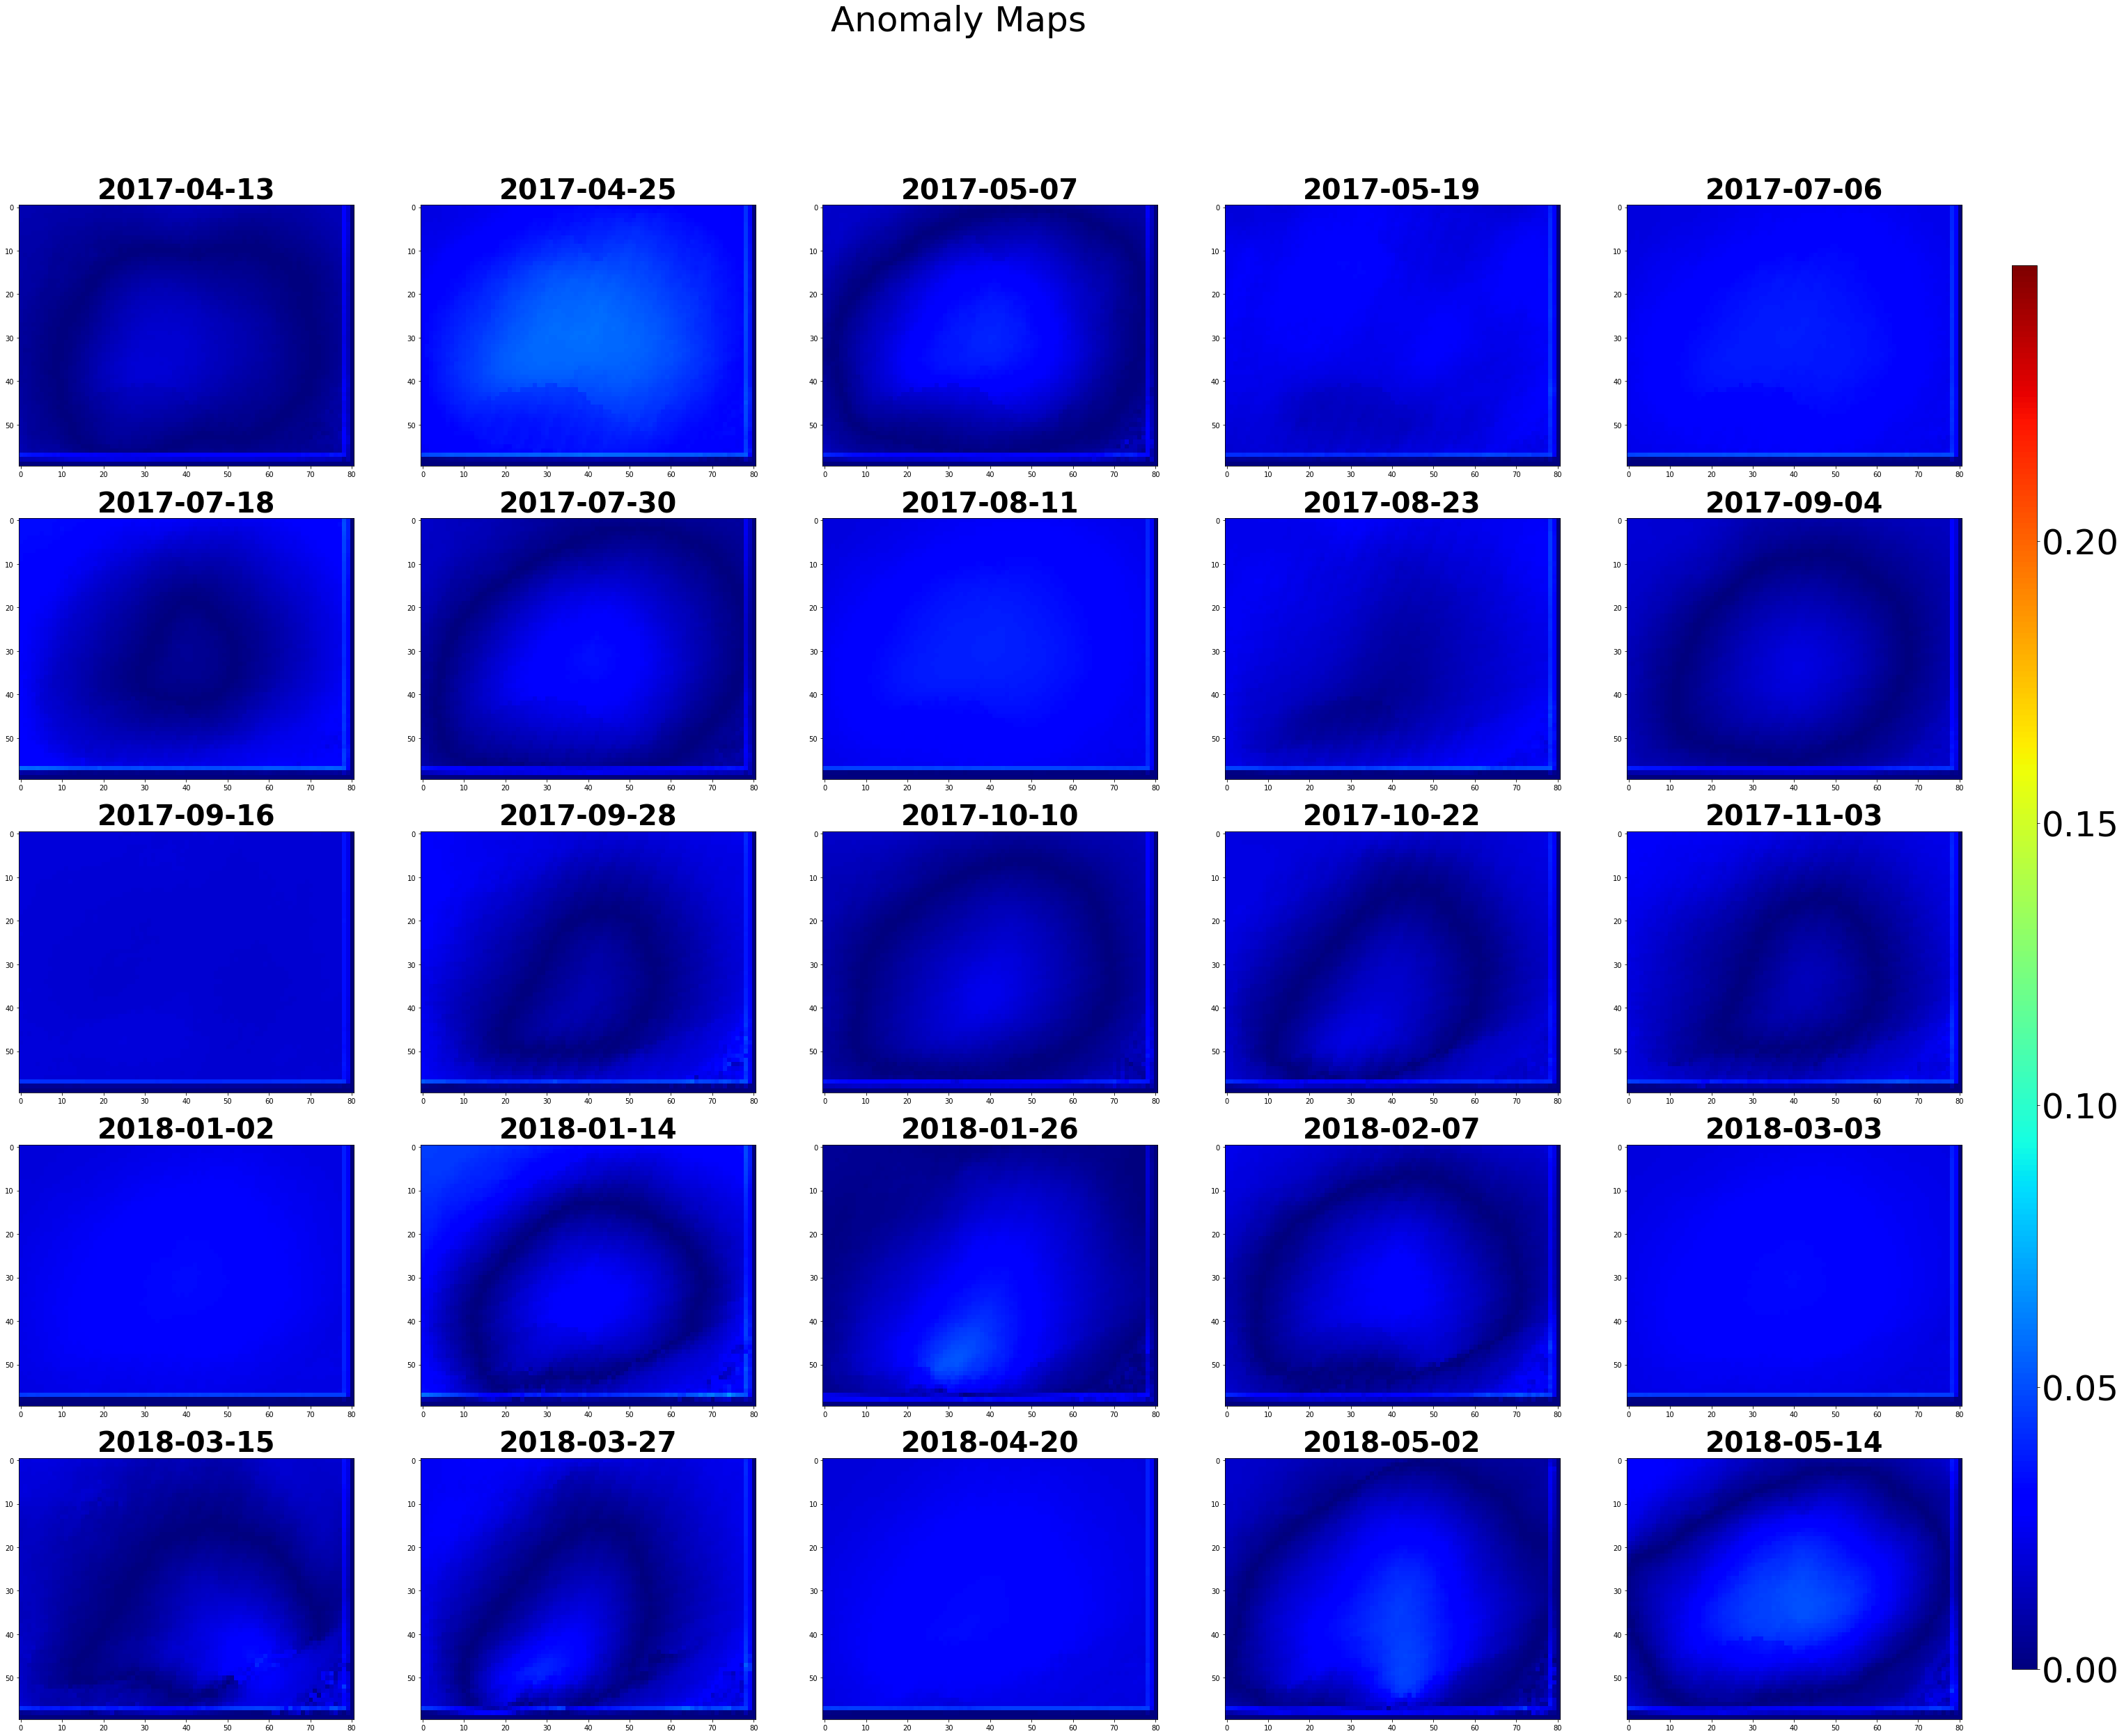

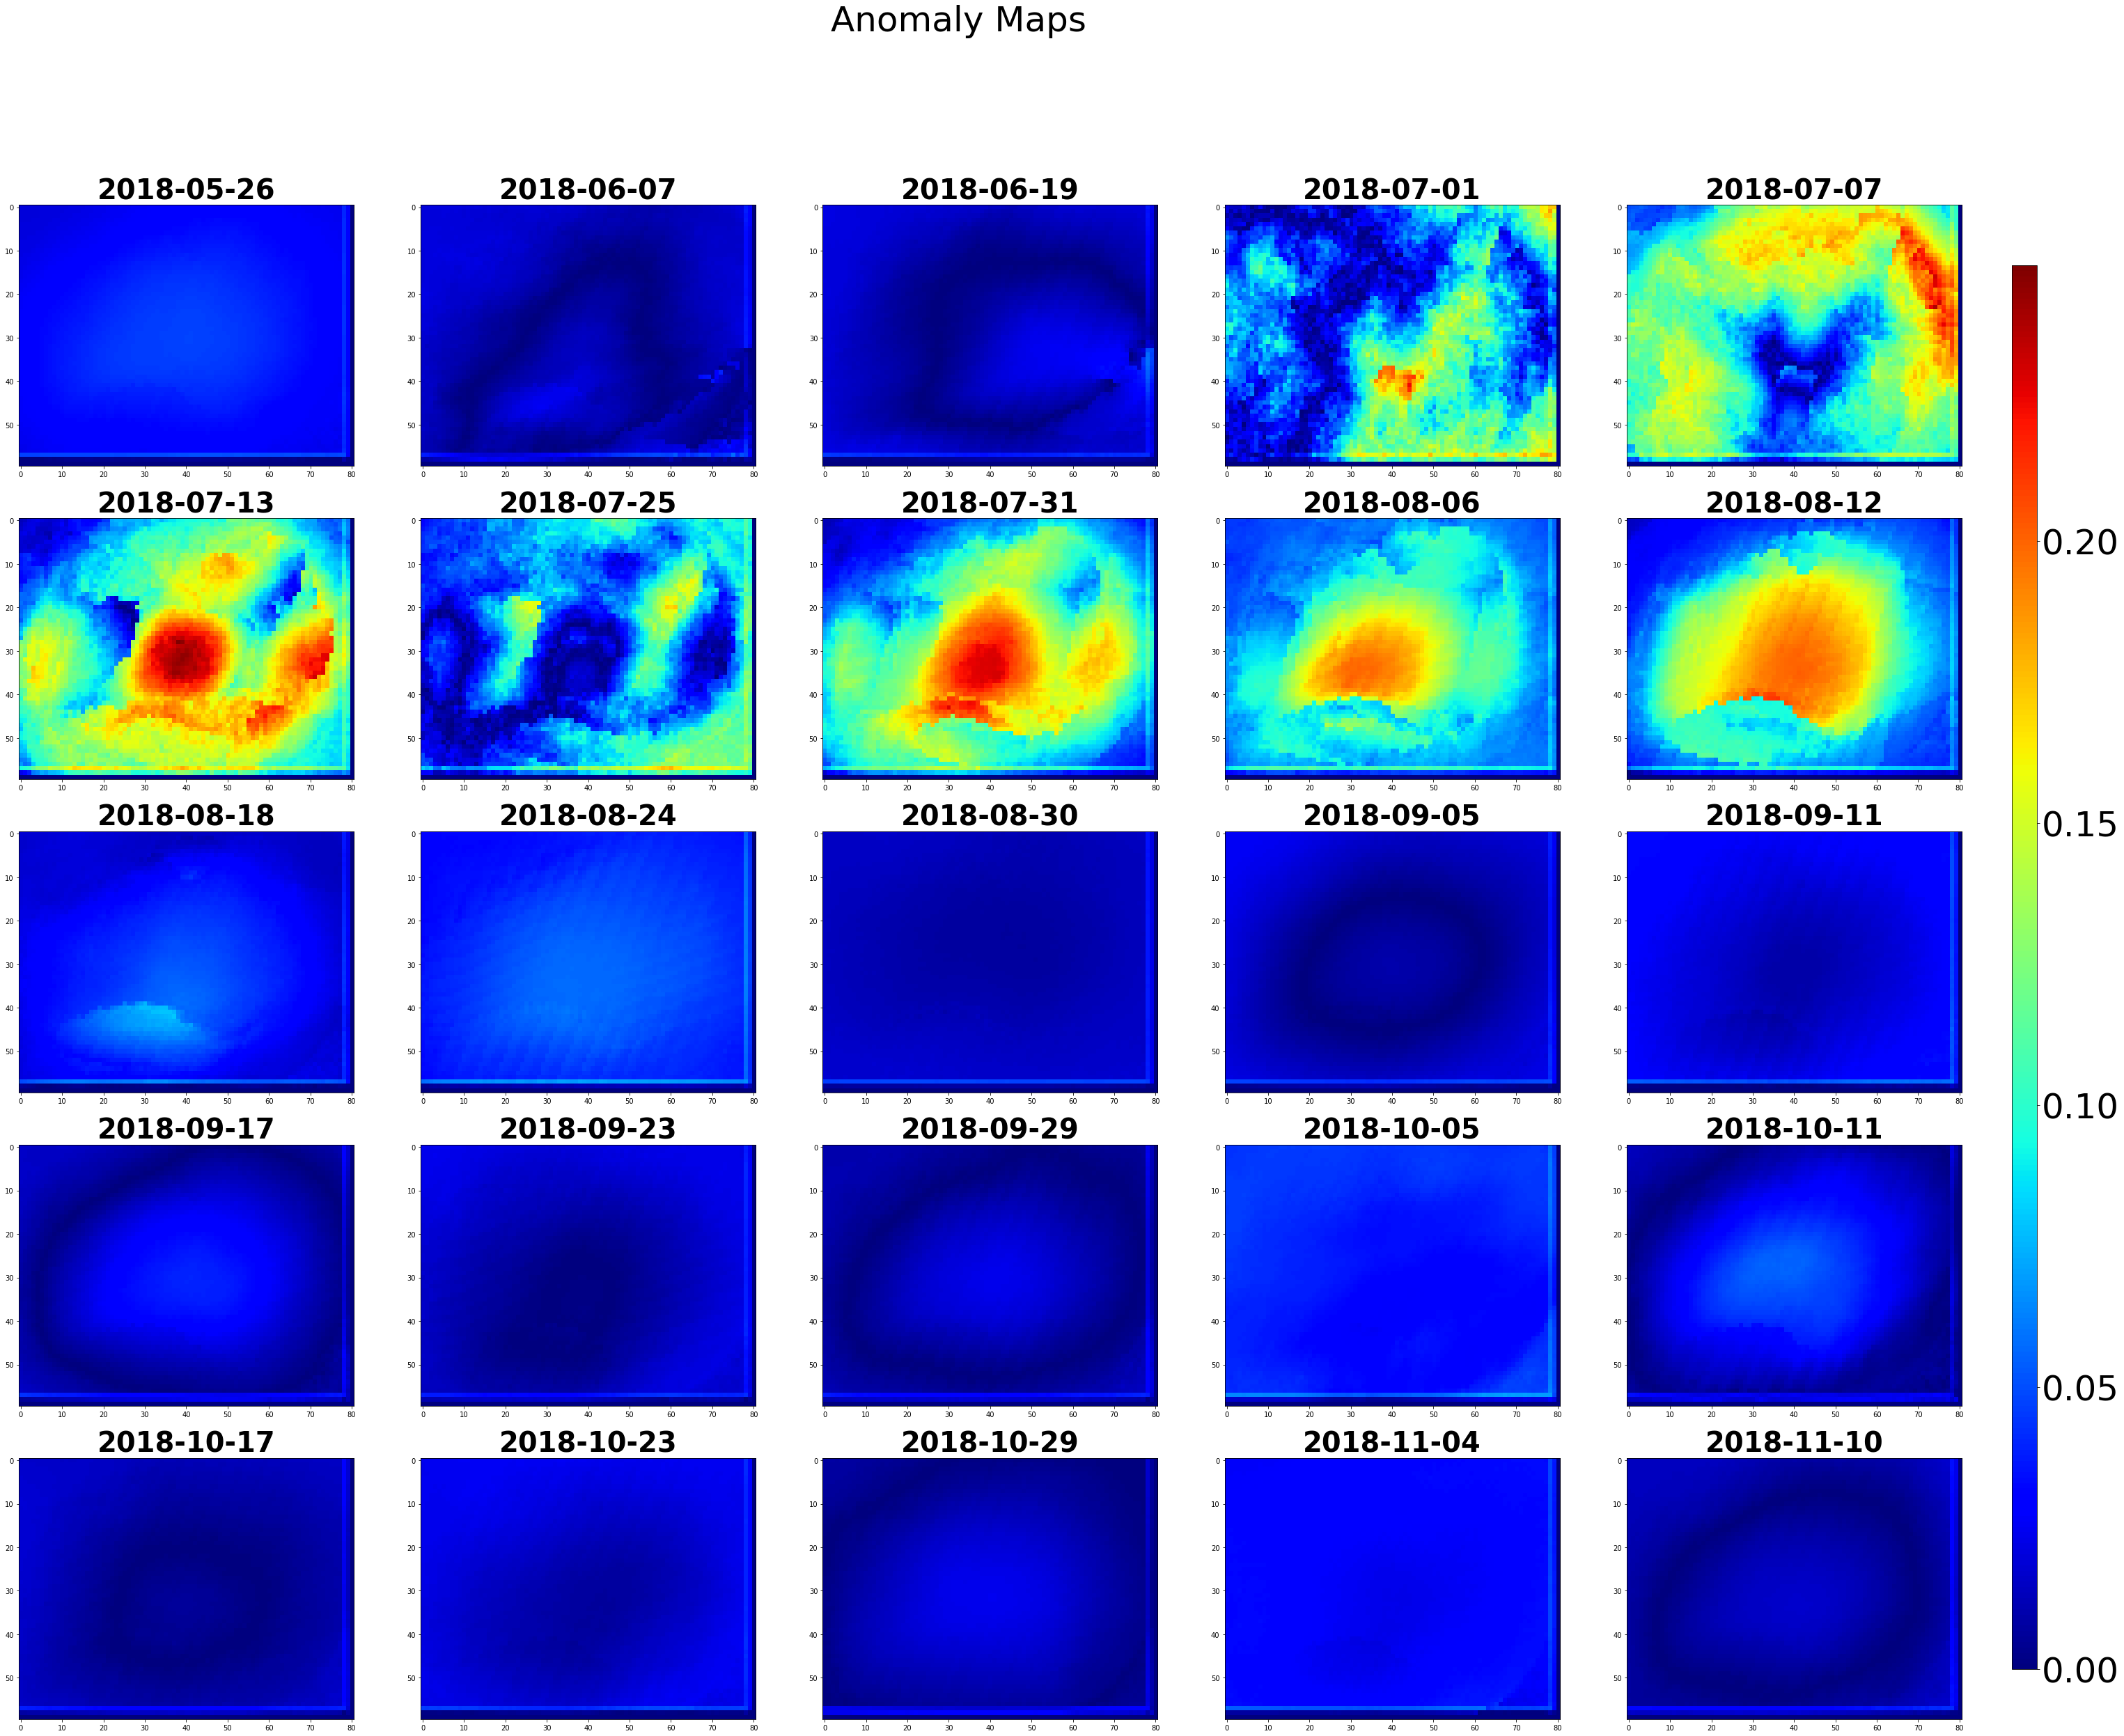

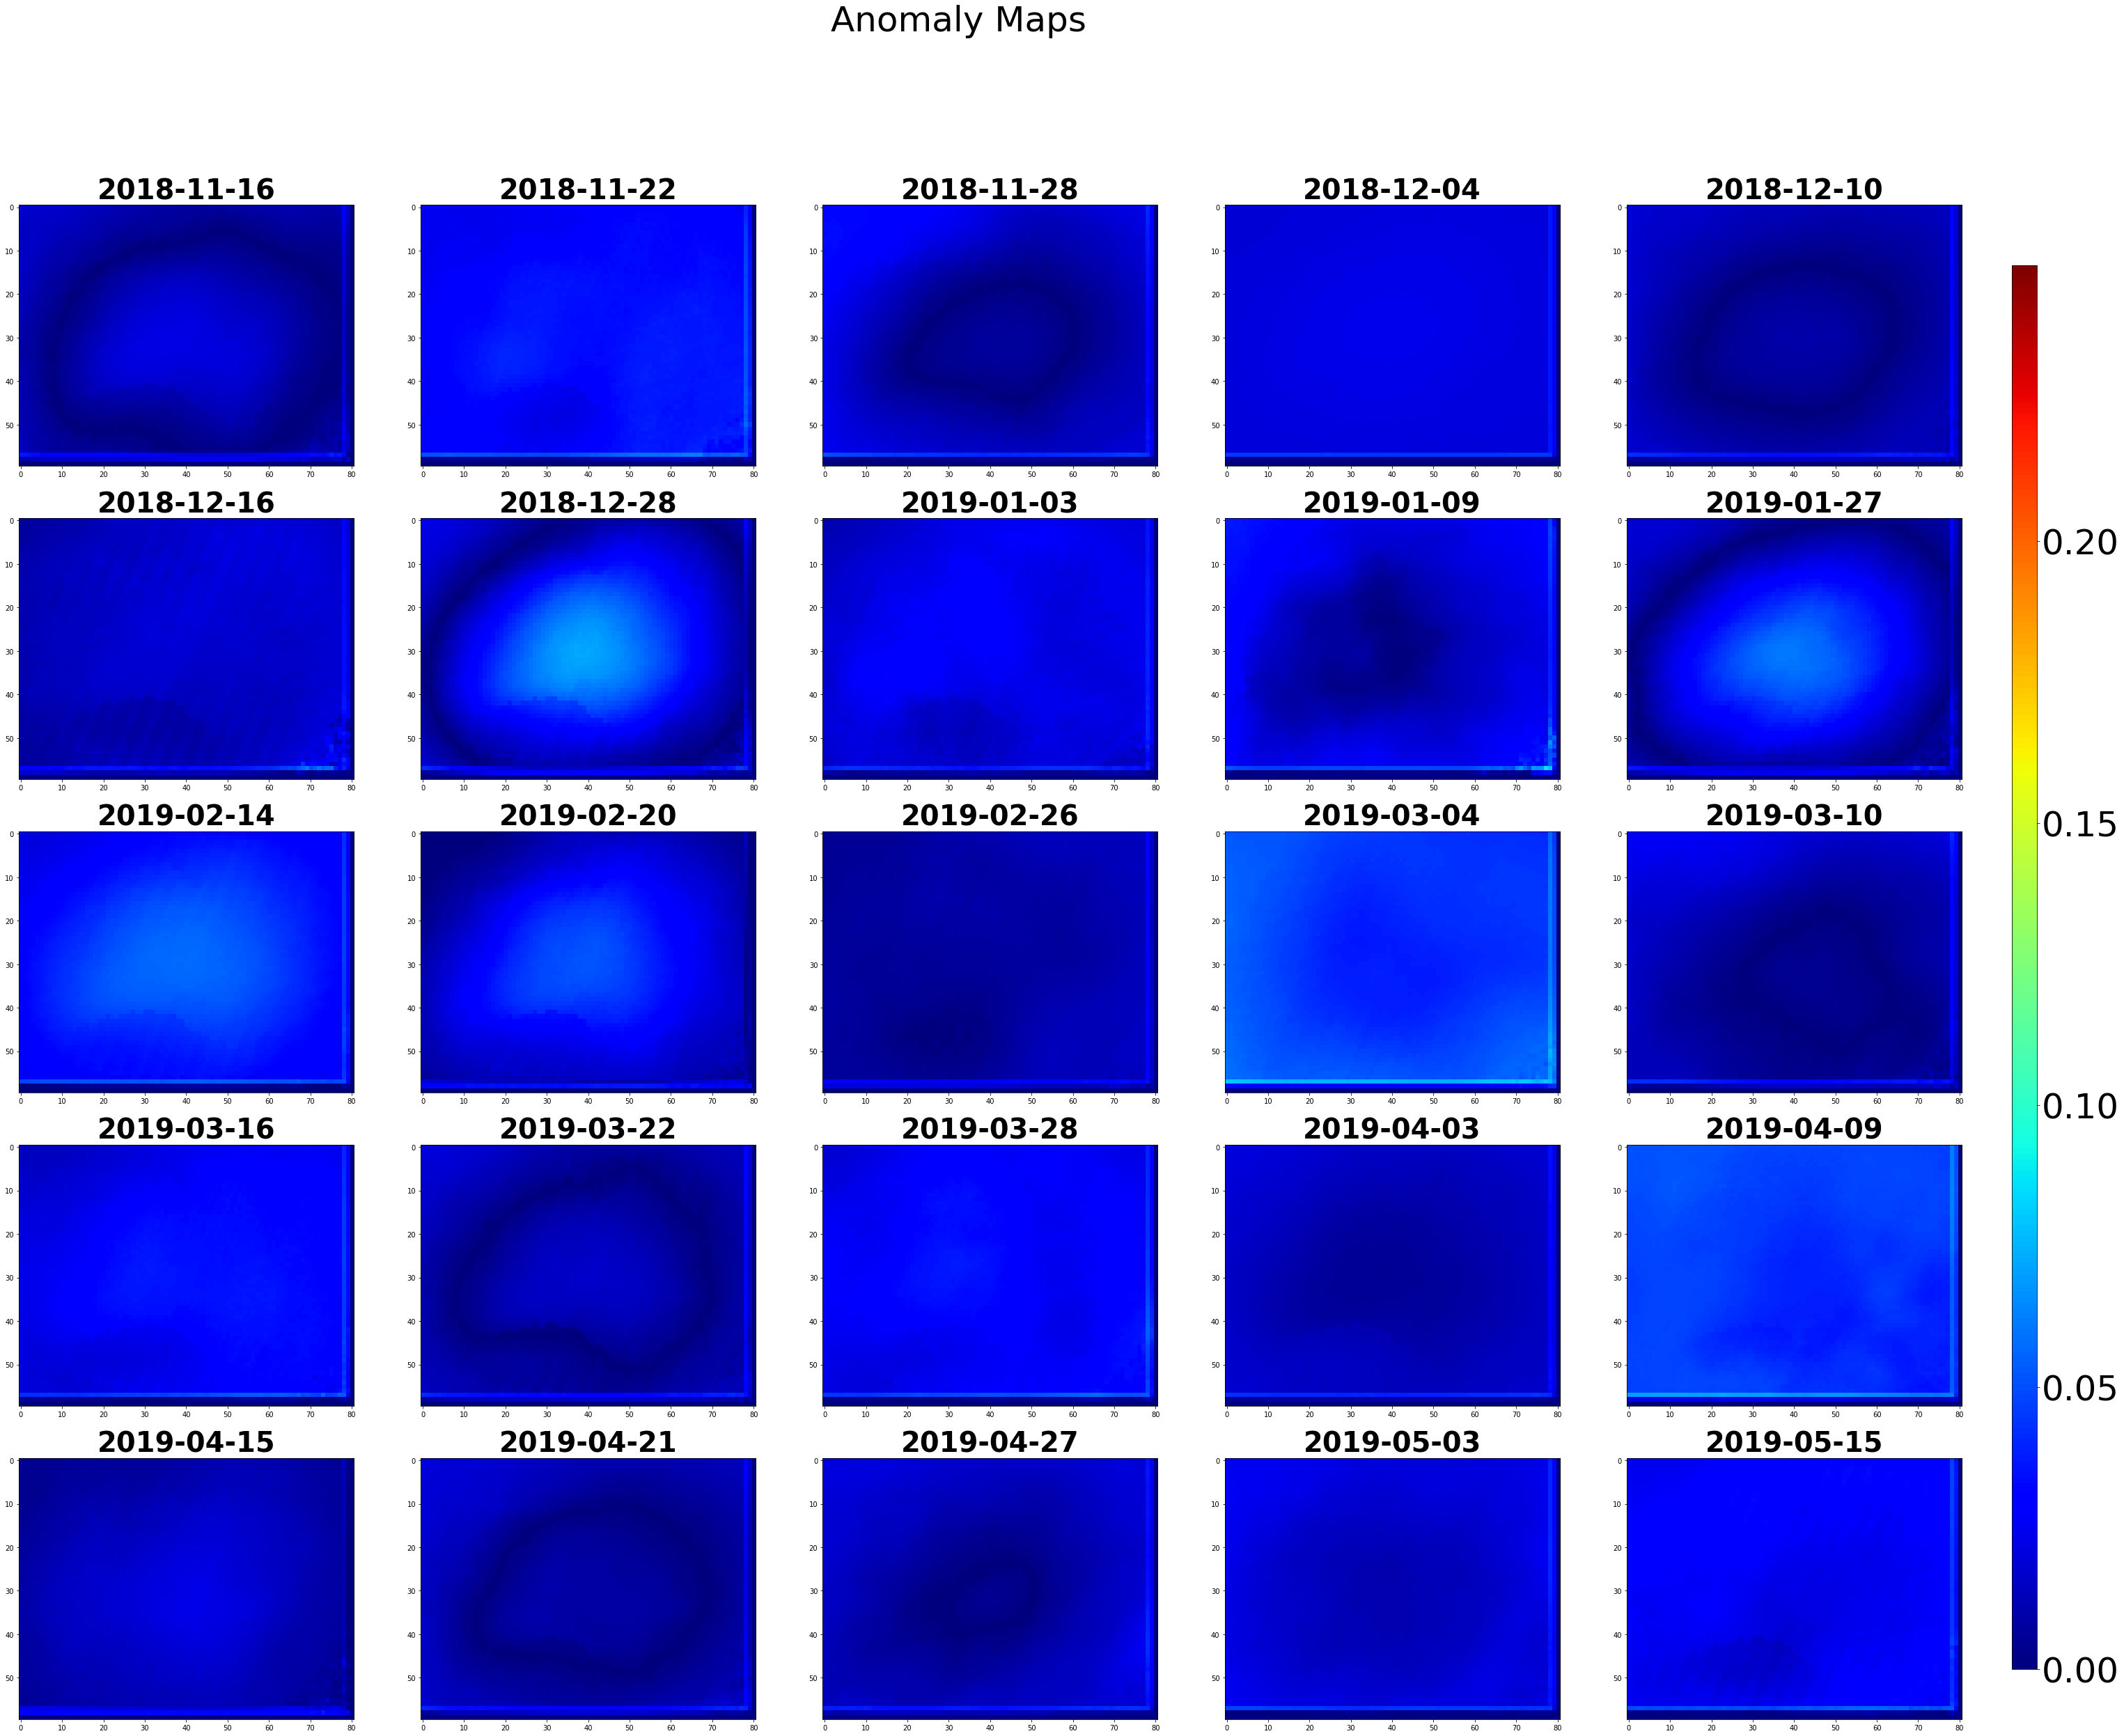

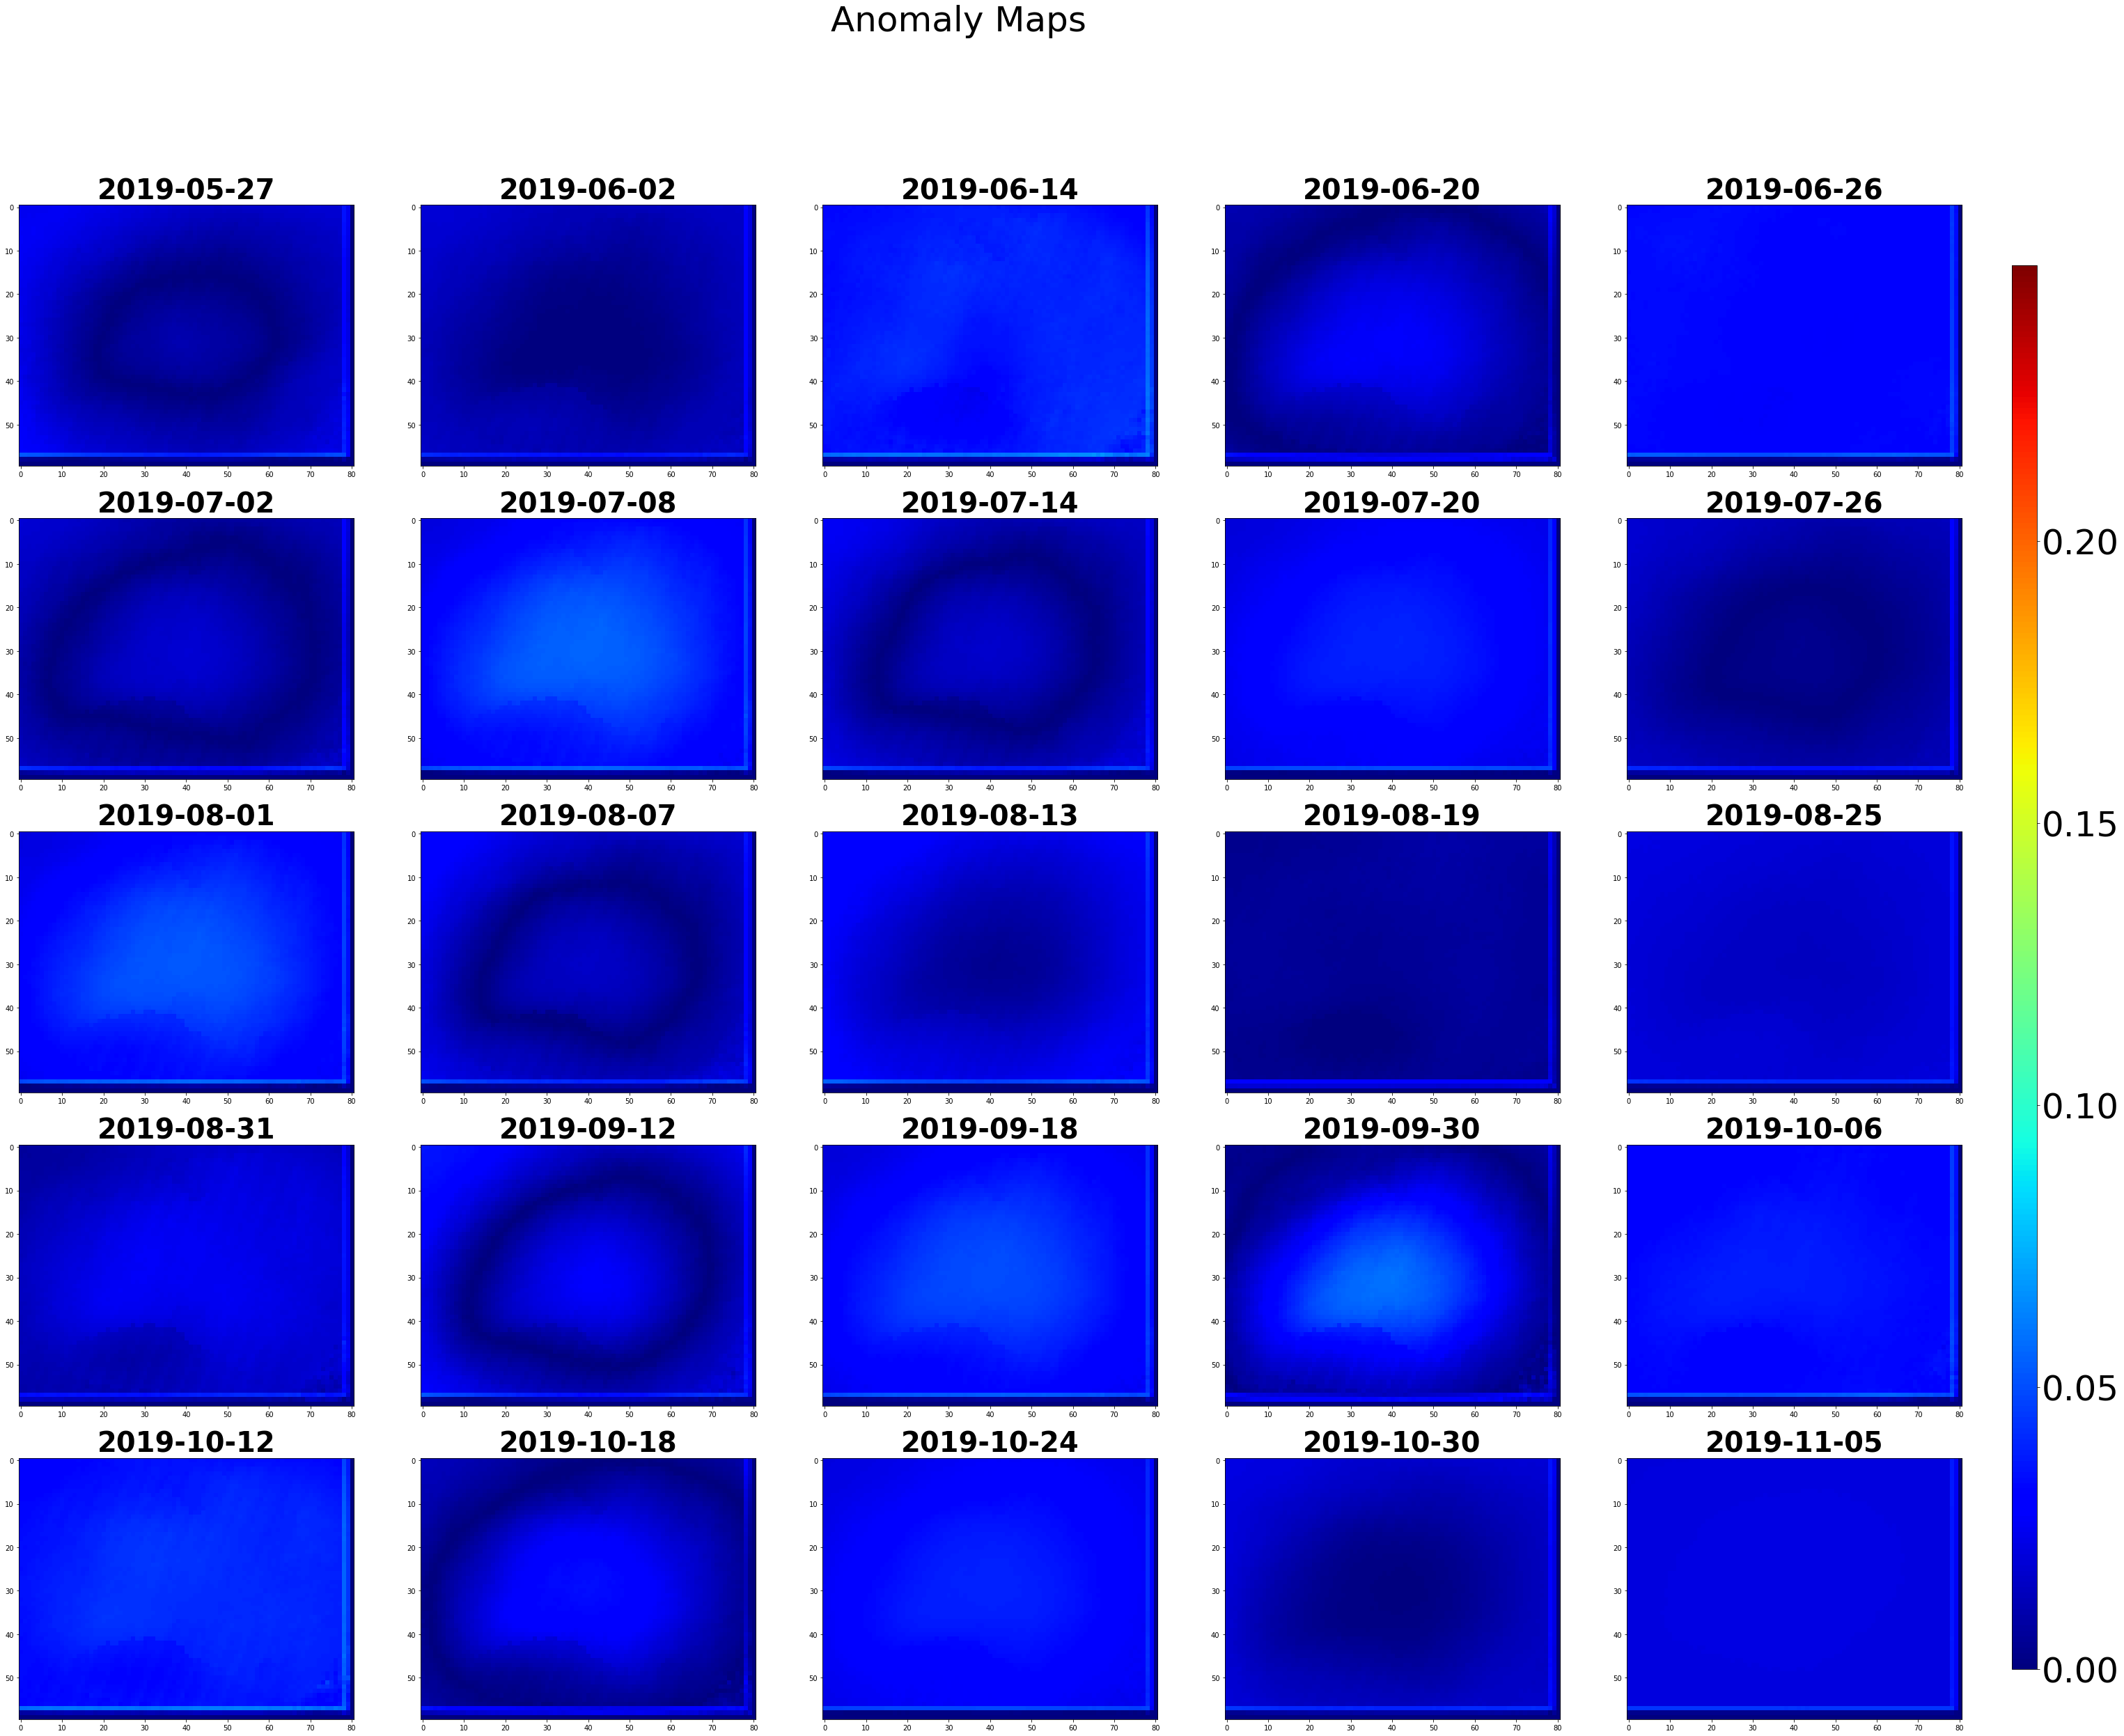

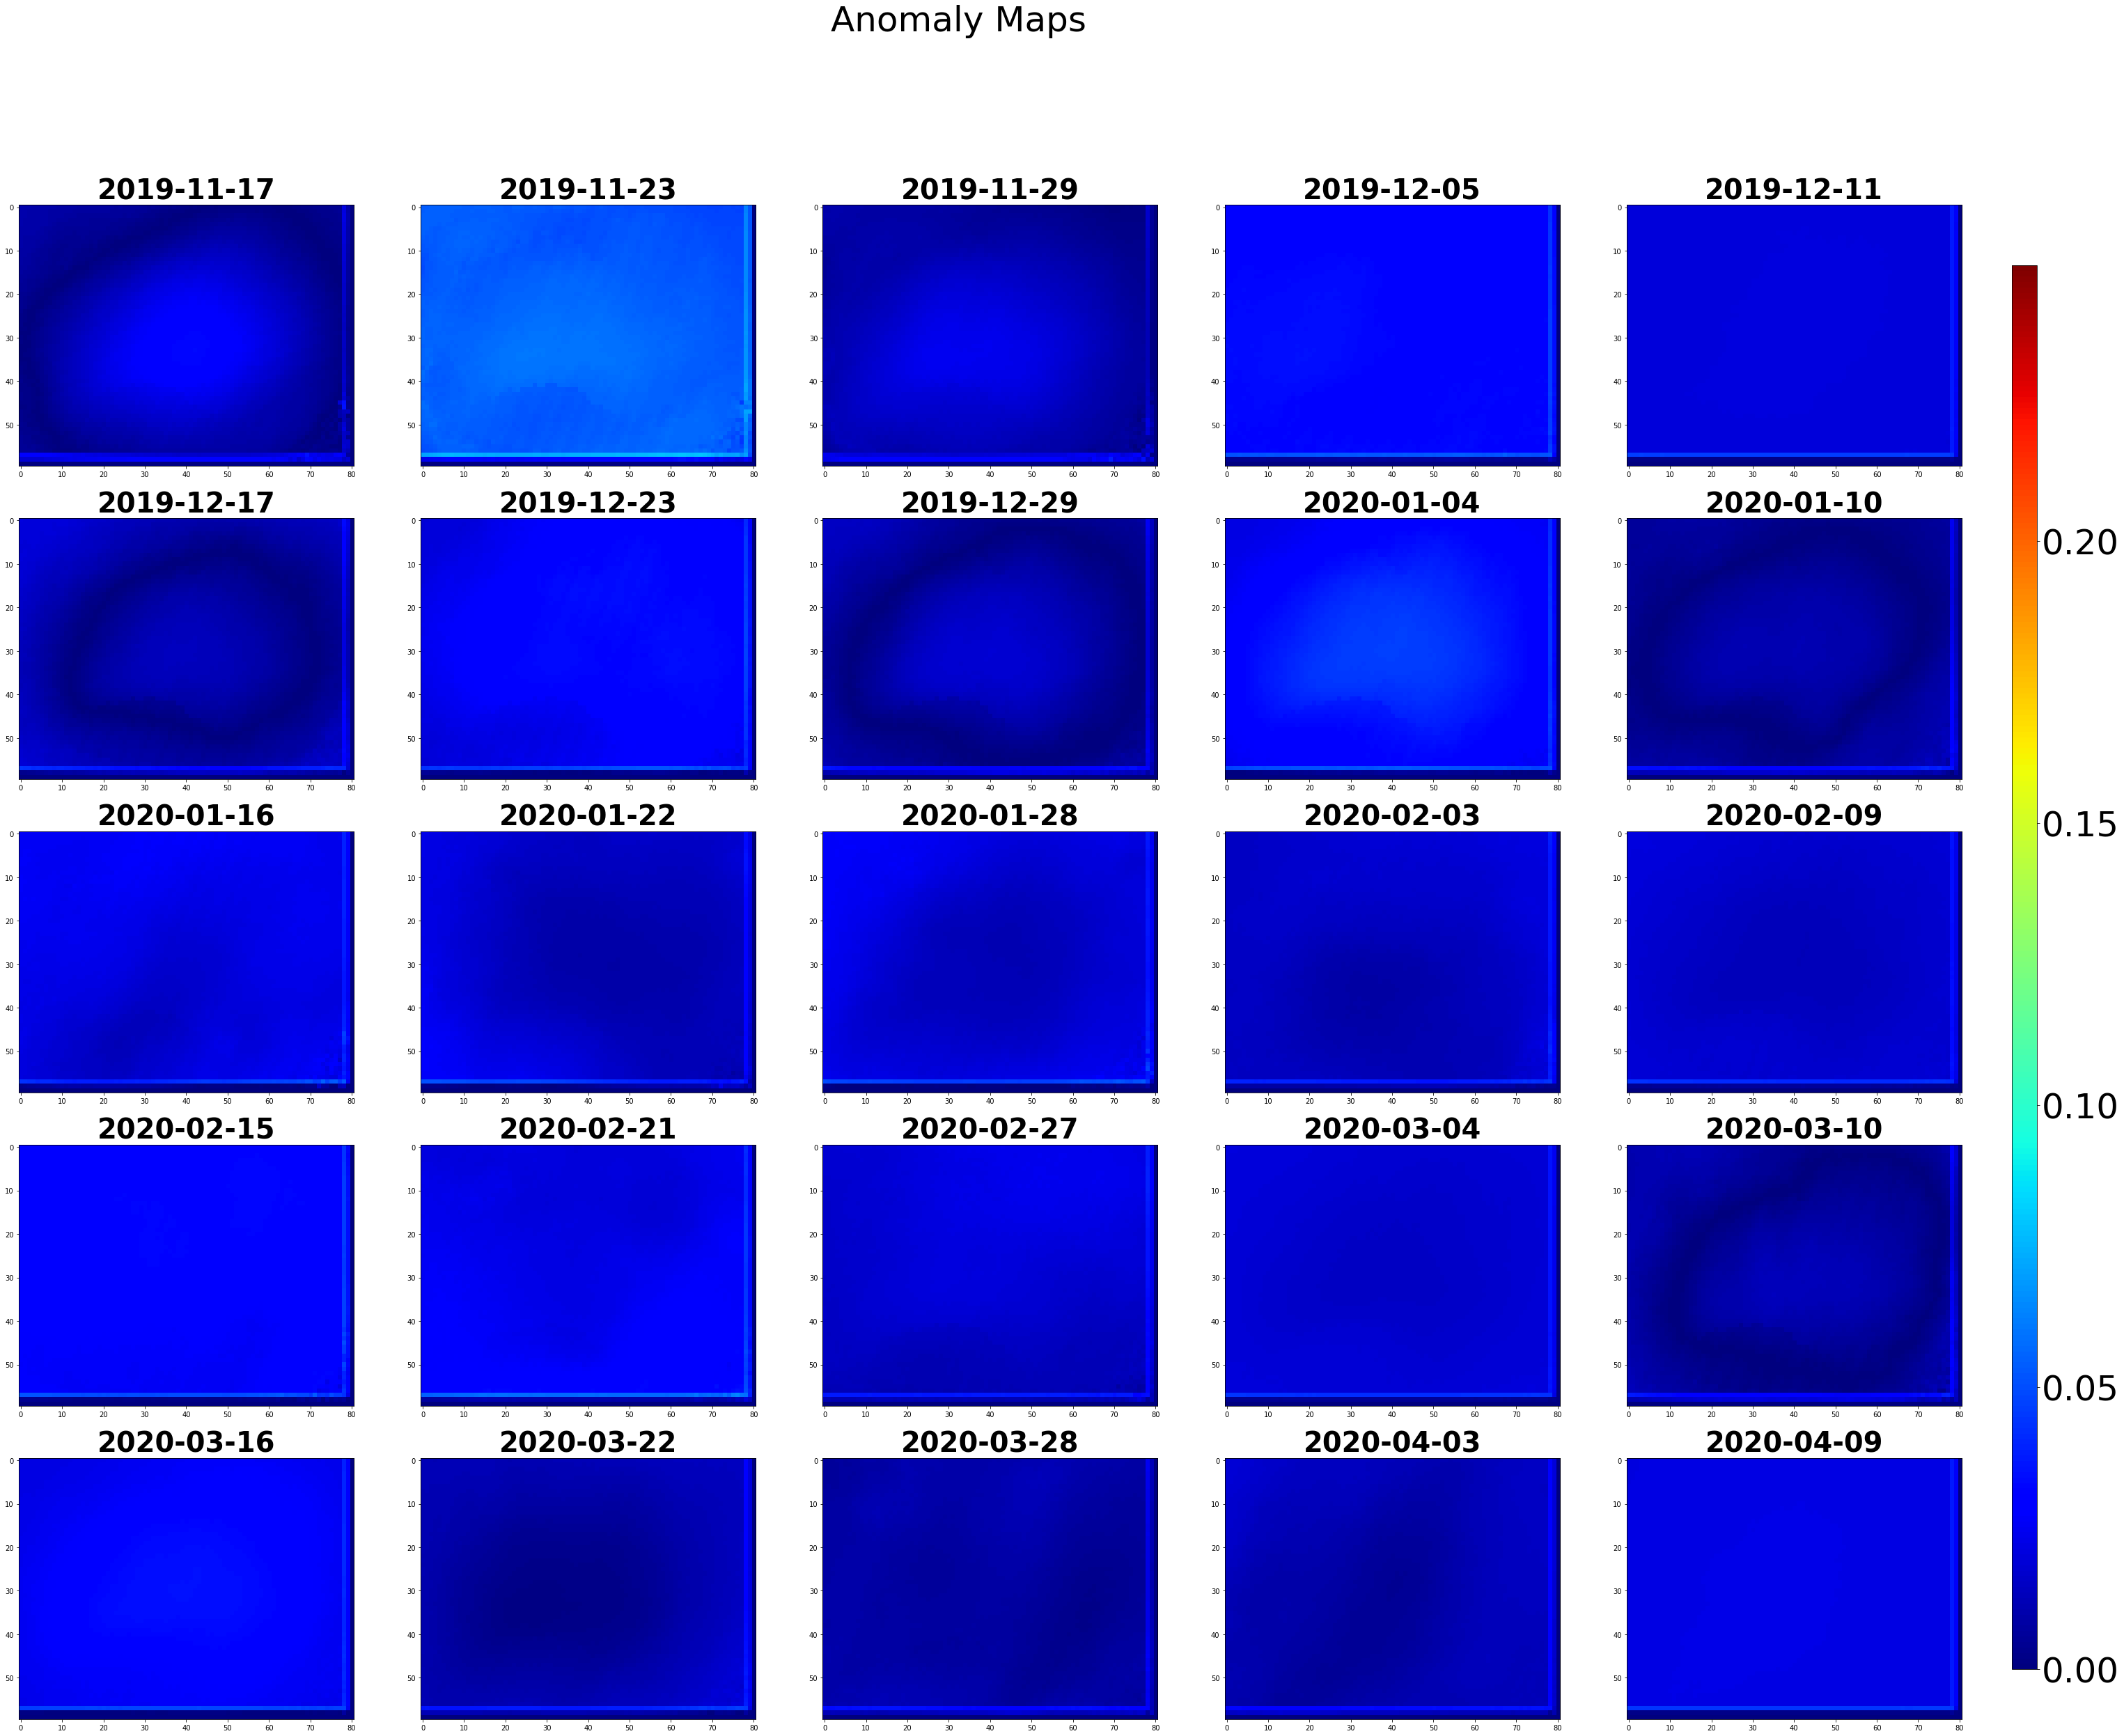

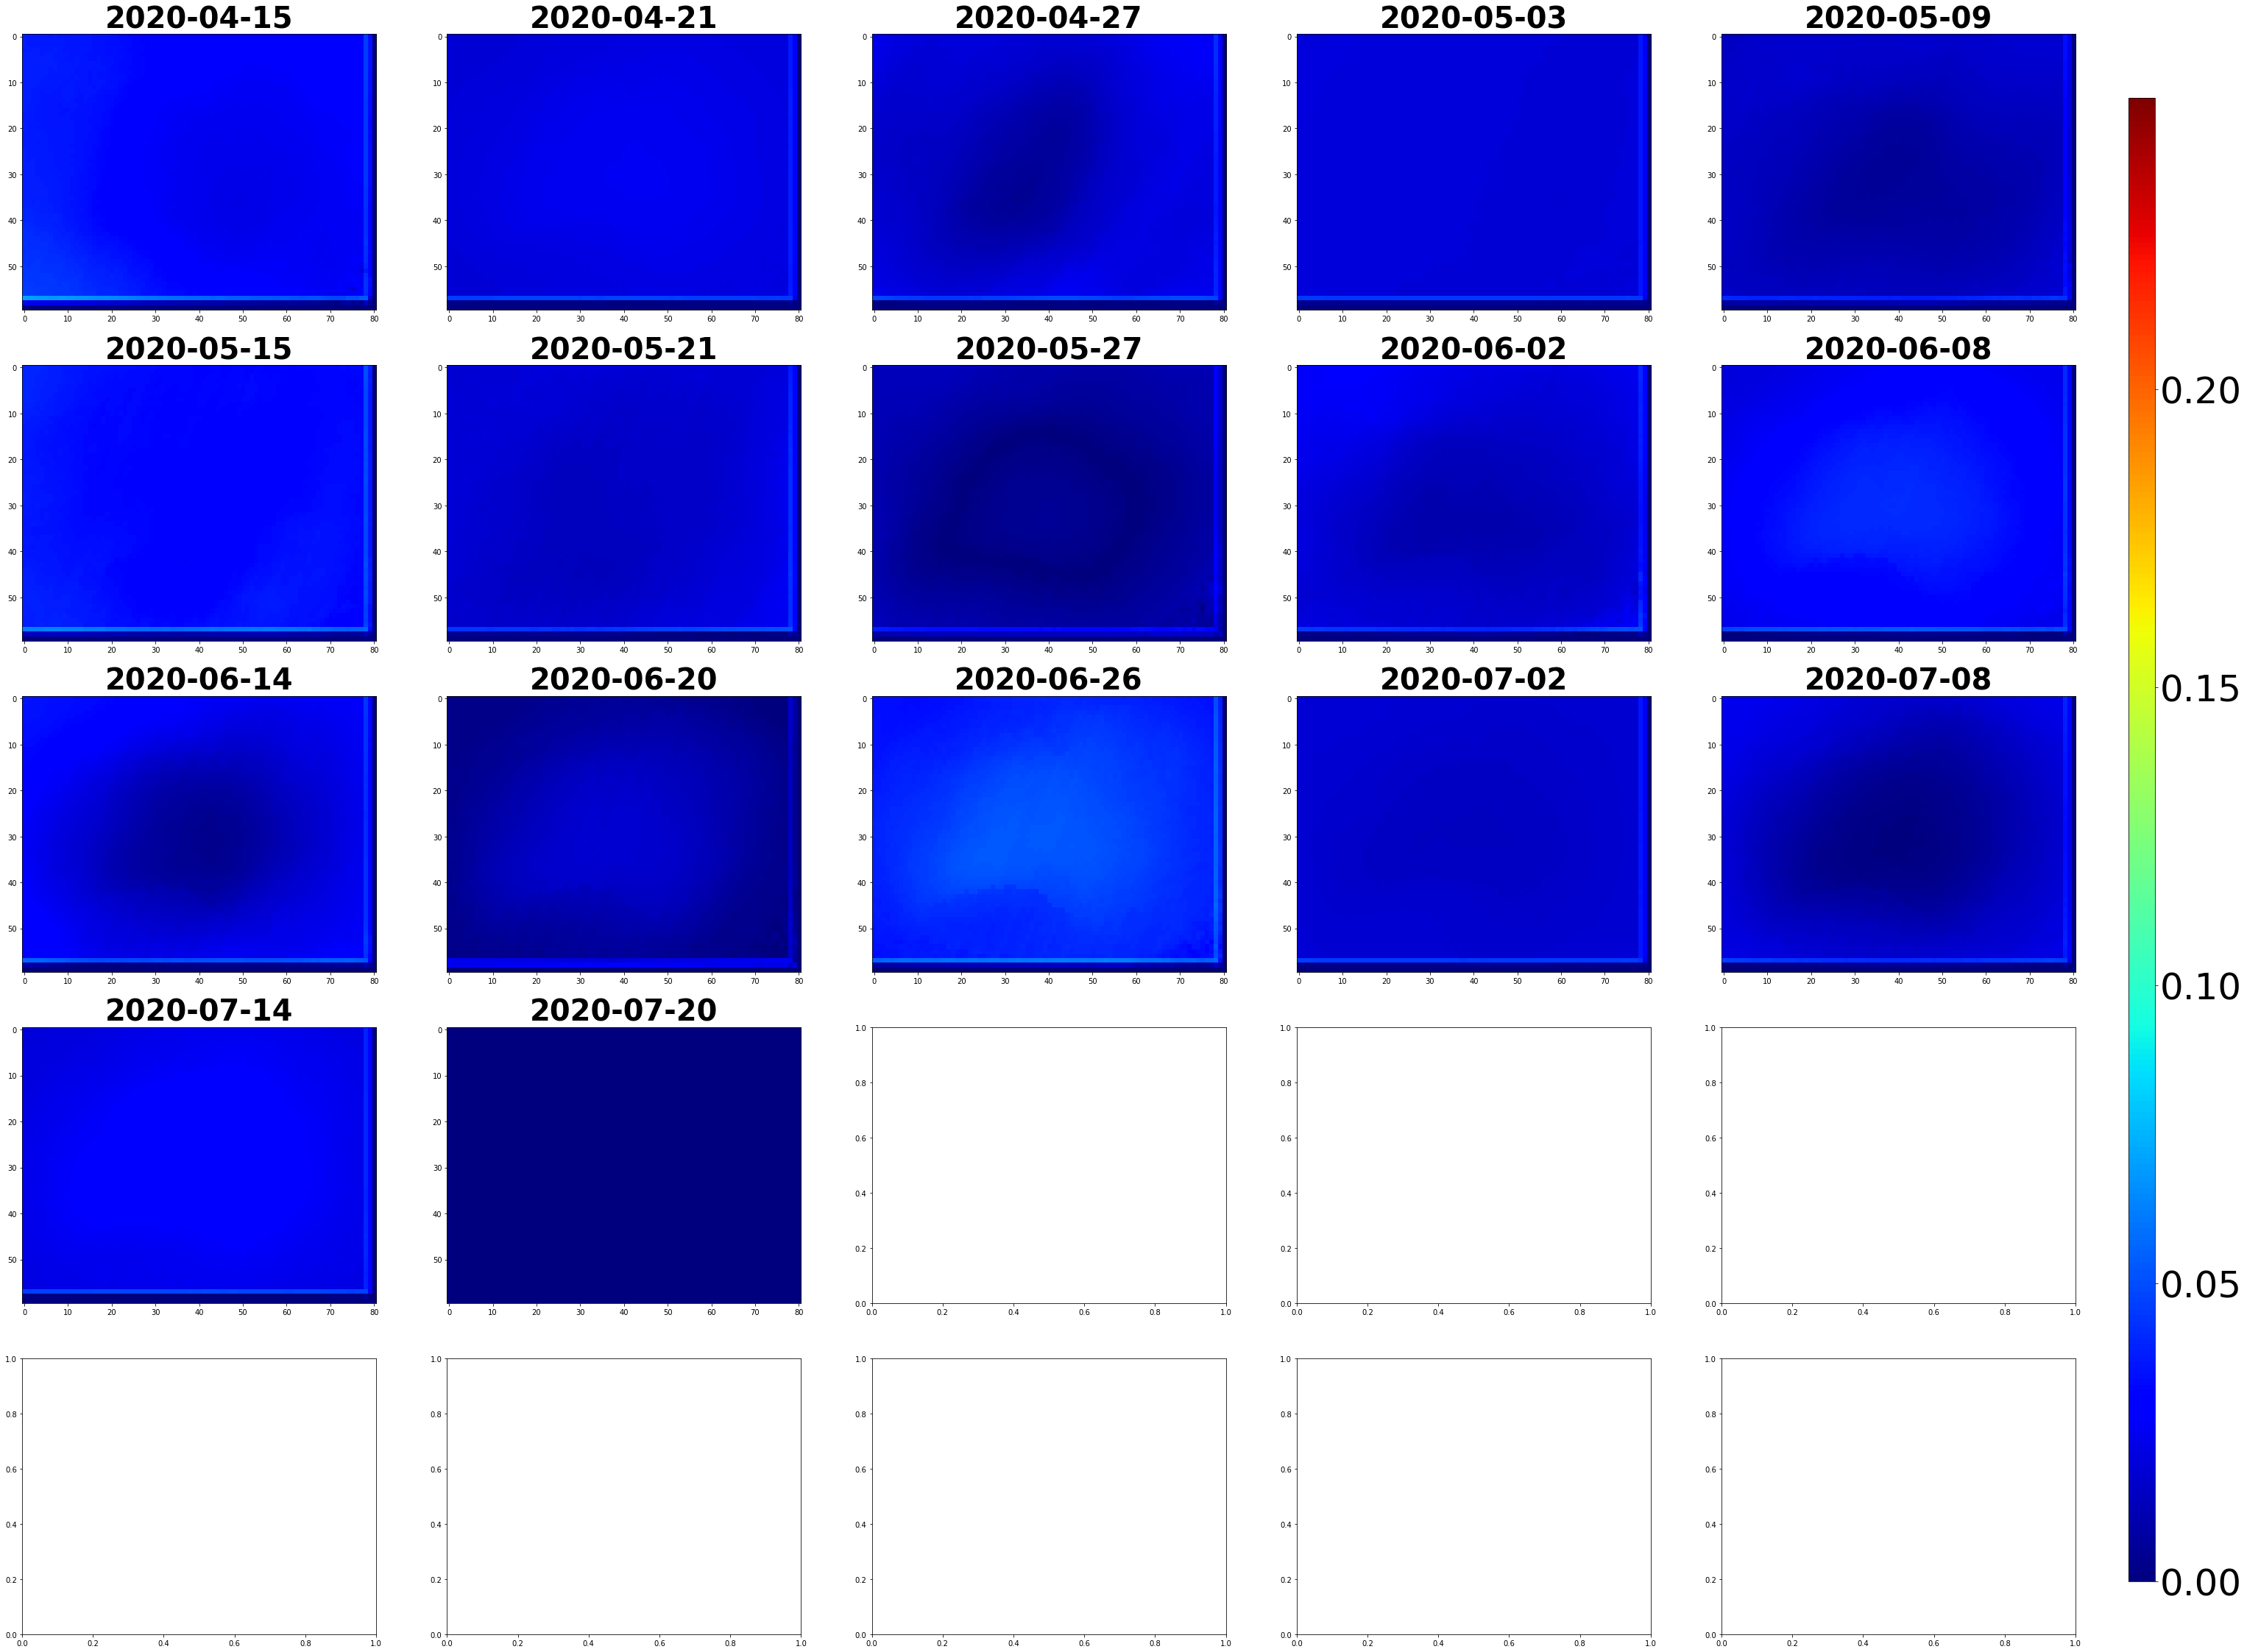

In [18]:
from viz_utils import * 
plot_timeseries2d(anomaly_map, dates[time_window+1:], 'Anomaly Maps', '.')